# Data Preparation & Visualisation Tasks

1. [Necessary Libraries](#1)
2. [Exploratory Data Analysis](#2)
    - [EDA on organic farm data](#a)
    - [EDA on organic operators](#b)
    - [EDA on population data](#c)
3. [Creating Dashboard](#3)

# Machine Learning Tasks

1. [Sentiment Analysis](#4)
2. [Classification and Regression with GridSearchCV](#5)
3. [Unsupervised Model](#6)
4. [Forecasting](#7)

## Necessary Libraries
<p id=1>

Panel is an open-source Python library that lets you create custom interactive web apps and dashboards by connecting user-defined widgets to plots, images, tables, or text.

https://panel.holoviz.org


Python 3.7 - Python 3.10
- conda install -c conda-forge hvplot
- conda install -c pyviz panel

In [23]:
# Warning ignoring
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from plotly.subplots import make_subplots
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

## Exploratory Data Analysis 
<p id= 2>

<b>Organic production of animal products</b>
<p id=a>

data source: https://ec.europa.eu/eurostat/databrowser/view/ORG_APROD/default/table

In [2]:
# Reading csv
org_df = pd.read_csv("org_aprod_linear.csv",encoding="UTF-8")

In [3]:
org_df.head(10)

,DATAFLOW,LAST UPDATE,freq,agriprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2016,5502.0,NaN
1,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2017,7321.0,NaN
2,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2018,8708.0,NaN
3,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2019,9601.0,NaN
4,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2020,10364.0,NaN
5,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BG,2012,0.0,NaN
6,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BG,2013,0.0,NaN
7,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BG,2014,0.0,NaN
8,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BG,2015,0.0,NaN
9,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BG,2016,373.0,NaN


In [4]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     3935 non-null   object 
 1   LAST UPDATE  3935 non-null   object 
 2   freq         3935 non-null   object 
 3   agriprod     3935 non-null   object 
 4   unit         3935 non-null   object 
 5   geo          3935 non-null   object 
 6   TIME_PERIOD  3935 non-null   int64  
 7   OBS_VALUE    3728 non-null   float64
 8   OBS_FLAG     367 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 276.8+ KB


In [5]:
org_df.isnull().sum()

DATAFLOW          0
LAST UPDATE       0
freq              0
agriprod          0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE       207
OBS_FLAG       3568
dtype: int64

In [6]:
org_df.describe()

,TIME_PERIOD,OBS_VALUE
count,3935.000000,3.728000e+03
mean,2016.455654,3.529611e+04
std,2.718444,1.384855e+05
min,2012.000000,0.000000e+00
25%,2014.000000,4.000000e+00
50%,2016.000000,3.215000e+02
75%,2019.000000,7.348000e+03
max,2021.000000,2.096600e+06


In [7]:
# Dropping Redundant Column
org_df = org_df.drop(["DATAFLOW","LAST UPDATE","freq","OBS_FLAG","unit"], axis=1)

#Dropping null values of OBS_VALUE
index = org_df.loc[org_df['OBS_VALUE'].isnull()].index
org_df.drop(index , inplace=True)

# Dropping the non EU countries 
nonEU = org_df.loc[(org_df['geo'] == 'IS')| (org_df['geo'] =='NO')| (org_df['geo'] =='UK')| (org_df['geo'] =='ME')| (org_df['geo'] =='MK')| (org_df['geo'] =='RS')| (org_df['geo'] =='TR')].index
org_df.drop(nonEU , inplace=True)

In [8]:
org_df.geo.unique()

array(['BE', 'BG', 'CY', 'CZ', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR',
       'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'RO', 'SE',
       'SI', 'SK', 'AT', 'DE'], dtype=object)

In [9]:
org_df.loc[org_df['agriprod'].str.contains('B0010', case=False), 'agriprod'] = 'Meat of Livestock'
org_df.loc[org_df['agriprod'].str.contains('B1000', case=False), 'agriprod'] = 'Bovine Meat'
org_df.loc[org_df['agriprod'].str.contains('B3100', case=False), 'agriprod'] = 'Pig Meat'
org_df.loc[org_df['agriprod'].str.contains('B4100', case=False), 'agriprod'] = 'Sheep Meat'
org_df.loc[org_df['agriprod'].str.contains('B4200', case=False), 'agriprod'] = 'Goat Meat'
org_df.loc[org_df['agriprod'].str.contains('B5000', case=False), 'agriprod'] = 'Horses-Asses-Mules-Hinnies Meat'
org_df.loc[org_df['agriprod'].str.contains('B7000', case=False), 'agriprod'] = 'Poultry Meat'
org_df.loc[org_df['agriprod'].str.contains('B7100', case=False), 'agriprod'] = 'Chicken Meat'
org_df.loc[org_df['agriprod'].str.contains('B8000', case=False), 'agriprod'] = 'Rabbit Meat'
org_df.loc[org_df['agriprod'].str.contains('B9000', case=False), 'agriprod'] = 'Other Meat'

org_df.loc[org_df['agriprod'].str.contains('D1100A', case=False), 'agriprod'] = 'Total Raw Milk'
org_df.loc[org_df['agriprod'].str.contains('D1110A', case=False), 'agriprod'] = 'Cows Milk'
org_df.loc[org_df['agriprod'].str.contains('D1120A', case=False), 'agriprod'] = 'Ewes Milk'
org_df.loc[org_df['agriprod'].str.contains('D1130A', case=False), 'agriprod'] = 'Goats Milk'
org_df.loc[org_df['agriprod'].str.contains('D1140A', case=False), 'agriprod'] = 'Buffalos Milk'

org_df.loc[org_df['agriprod'].str.contains('D2100', case=False), 'agriprod'] = 'Drinking Milk'
org_df.loc[org_df['agriprod'].str.contains('D2200', case=False), 'agriprod'] = 'Cream'
org_df.loc[org_df['agriprod'].str.contains('D4100', case=False), 'agriprod'] = 'Acidified Milk'
org_df.loc[org_df['agriprod'].str.contains('D6100', case=False), 'agriprod'] = 'Butter'
org_df.loc[org_df['agriprod'].str.contains('D7100', case=False), 'agriprod'] = 'Cheese'

org_df.loc[org_df['agriprod'].str.contains('D8000H', case=False), 'agriprod'] = 'Eggs for consumption'
org_df.loc[org_df['agriprod'].str.contains('D9500', case=False), 'agriprod'] = 'Other Dairy Product'
org_df.loc[org_df['agriprod'].str.contains('D9910', case=False), 'agriprod'] = 'Honey'

In [10]:
org_df.head()

,agriprod,geo,TIME_PERIOD,OBS_VALUE
0,Meat of Livestock,BE,2016,5502.0
1,Meat of Livestock,BE,2017,7321.0
2,Meat of Livestock,BE,2018,8708.0
3,Meat of Livestock,BE,2019,9601.0
4,Meat of Livestock,BE,2020,10364.0


In [11]:
df=org_df
df = df.pivot_table(index = [df.geo,
                        df.groupby(['geo','agriprod']).cumcount()],
               columns = 'agriprod',
               values = 'OBS_VALUE')

In [12]:
df.rename_axis(columns = None).reset_index()
df.reset_index(inplace=True)
df

agriprod,geo,level_1,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,...,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Rabbit Meat,Sheep Meat,Total Raw Milk
0,AT,0,29591.0,NaN,NaN,3586.0,30736.0,NaN,635751.0,4645.0,...,NaN,NaN,NaN,2971.0,NaN,NaN,NaN,NaN,NaN,443486.0
1,AT,1,26449.0,NaN,NaN,3793.0,29930.0,NaN,642340.0,5591.0,...,NaN,NaN,NaN,3200.0,NaN,NaN,NaN,NaN,NaN,440924.0
2,AT,2,31950.0,NaN,NaN,3792.0,28312.0,NaN,661688.0,5040.0,...,NaN,NaN,NaN,3174.0,NaN,NaN,NaN,NaN,NaN,552389.0
3,AT,3,32126.0,NaN,NaN,4070.0,30834.0,NaN,NaN,5694.0,...,NaN,NaN,NaN,3043.0,NaN,NaN,NaN,NaN,NaN,612629.0
4,AT,4,37354.0,NaN,NaN,4822.0,31836.0,NaN,NaN,7524.0,...,NaN,NaN,NaN,3803.0,NaN,NaN,NaN,NaN,NaN,635751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,SK,4,98.0,NaN,NaN,11.0,656.0,NaN,15349.0,0.0,...,1.0,0.0,175.0,23.0,0.0,0.0,0.0,NaN,194.0,16536.0
236,SK,5,32.0,NaN,NaN,24.0,139.0,NaN,19184.0,0.0,...,4.0,NaN,237.0,16.0,NaN,7.0,NaN,NaN,NaN,21140.0
237,SK,6,30.0,NaN,NaN,19.0,79.0,NaN,24811.0,0.0,...,0.0,NaN,66.0,0.0,NaN,NaN,NaN,NaN,NaN,25998.0
238,SK,7,50.0,NaN,NaN,25.0,170.0,NaN,NaN,0.0,...,NaN,NaN,53.0,55.0,NaN,NaN,NaN,NaN,NaN,19598.0


In [13]:
# Inserting Time period information to new pivotted data
k=0
for i in df['geo'].unique():
    for j in org_df[(org_df['geo'] == i)].TIME_PERIOD.unique():
        df.level_1[k] = j
        k +=1
#         print('i',i)
#         print('j',j)

In [14]:
df.rename(columns = {'level_1':'year'}, inplace = True)
df

agriprod,geo,year,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,...,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Rabbit Meat,Sheep Meat,Total Raw Milk
0,AT,2014,29591.0,NaN,NaN,3586.0,30736.0,NaN,635751.0,4645.0,...,NaN,NaN,NaN,2971.0,NaN,NaN,NaN,NaN,NaN,443486.0
1,AT,2015,26449.0,NaN,NaN,3793.0,29930.0,NaN,642340.0,5591.0,...,NaN,NaN,NaN,3200.0,NaN,NaN,NaN,NaN,NaN,440924.0
2,AT,2016,31950.0,NaN,NaN,3792.0,28312.0,NaN,661688.0,5040.0,...,NaN,NaN,NaN,3174.0,NaN,NaN,NaN,NaN,NaN,552389.0
3,AT,2017,32126.0,NaN,NaN,4070.0,30834.0,NaN,NaN,5694.0,...,NaN,NaN,NaN,3043.0,NaN,NaN,NaN,NaN,NaN,612629.0
4,AT,2018,37354.0,NaN,NaN,4822.0,31836.0,NaN,NaN,7524.0,...,NaN,NaN,NaN,3803.0,NaN,NaN,NaN,NaN,NaN,635751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,SK,2016,98.0,NaN,NaN,11.0,656.0,NaN,15349.0,0.0,...,1.0,0.0,175.0,23.0,0.0,0.0,0.0,NaN,194.0,16536.0
236,SK,2017,32.0,NaN,NaN,24.0,139.0,NaN,19184.0,0.0,...,4.0,NaN,237.0,16.0,NaN,7.0,NaN,NaN,NaN,21140.0
237,SK,2018,30.0,NaN,NaN,19.0,79.0,NaN,24811.0,0.0,...,0.0,NaN,66.0,0.0,NaN,NaN,NaN,NaN,NaN,25998.0
238,SK,2019,50.0,NaN,NaN,25.0,170.0,NaN,NaN,0.0,...,NaN,NaN,53.0,55.0,NaN,NaN,NaN,NaN,NaN,19598.0


In [15]:
df.columns

Index(['geo', 'year', 'Acidified Milk', 'Bovine Meat', 'Buffalos Milk',
       'Butter', 'Cheese', 'Chicken Meat', 'Cows Milk', 'Cream',
       'Drinking Milk', 'Eggs for consumption', 'Ewes Milk', 'Goat Meat',
       'Goats Milk', 'Honey', 'Horses-Asses-Mules-Hinnies Meat',
       'Meat of Livestock', 'Other Dairy Product', 'Other Meat', 'Pig Meat',
       'Poultry Meat', 'Rabbit Meat', 'Sheep Meat', 'Total Raw Milk'],
      dtype='object', name='agriprod')

In [16]:
# Handling Missing Values
# Rabbit Meat is NaN or zero. It is dropped to perform correlation analysis
df = df.drop(["Rabbit Meat"], axis=1)

# Filling with zeros the nan values
df.fillna(0, inplace = True)
for i in df.index:
#      print(i)
    if df['Meat of Livestock'][i] == 0:
        df.loc[:,df.columns.str.contains("Meat")].sum(axis = 1)

# the column of Eggs for consumption has unit of thousand. To convert this column to tonnes unit:
# 1 egg is approximately 50 gr. And 1 tonne is 1000000 gr
df['Eggs for consumption'] = df['Eggs for consumption'].apply(lambda x: x*50/1000000)
df

agriprod,geo,year,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,...,Goats Milk,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Sheep Meat,Total Raw Milk
0,AT,2014,29591.0,0.0,0.0,3586.0,30736.0,0.0,635751.0,4645.0,...,0.0,0.0,0.0,0.0,2971.0,0.0,0.0,0.0,0.0,443486.0
1,AT,2015,26449.0,0.0,0.0,3793.0,29930.0,0.0,642340.0,5591.0,...,0.0,0.0,0.0,0.0,3200.0,0.0,0.0,0.0,0.0,440924.0
2,AT,2016,31950.0,0.0,0.0,3792.0,28312.0,0.0,661688.0,5040.0,...,0.0,0.0,0.0,0.0,3174.0,0.0,0.0,0.0,0.0,552389.0
3,AT,2017,32126.0,0.0,0.0,4070.0,30834.0,0.0,0.0,5694.0,...,0.0,0.0,0.0,0.0,3043.0,0.0,0.0,0.0,0.0,612629.0
4,AT,2018,37354.0,0.0,0.0,4822.0,31836.0,0.0,0.0,7524.0,...,0.0,0.0,0.0,0.0,3803.0,0.0,0.0,0.0,0.0,635751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,SK,2016,98.0,0.0,0.0,11.0,656.0,0.0,15349.0,0.0,...,48.0,1.0,0.0,175.0,23.0,0.0,0.0,0.0,194.0,16536.0
236,SK,2017,32.0,0.0,0.0,24.0,139.0,0.0,19184.0,0.0,...,57.0,4.0,0.0,237.0,16.0,0.0,7.0,0.0,0.0,21140.0
237,SK,2018,30.0,0.0,0.0,19.0,79.0,0.0,24811.0,0.0,...,101.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,25998.0
238,SK,2019,50.0,0.0,0.0,25.0,170.0,0.0,0.0,0.0,...,0.0,0.0,0.0,53.0,55.0,0.0,0.0,0.0,0.0,19598.0


In [17]:
df.describe()

agriprod,year,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,Drinking Milk,...,Goats Milk,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Sheep Meat,Total Raw Milk
count,240.000000,240.000000,240.00000,240.000000,240.000000,240.00000,240.000000,2.400000e+02,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,2016.416667,6240.745833,3736.13750,0.029167,1488.129167,6330.98750,16.925000,1.032683e+05,865.487500,45002.979167,...,2243.083333,316.141667,21.816667,7436.070833,371.362500,5.120833,1484.550000,972.037500,591.133333,1.631821e+05
std,2.758277,13954.420157,7465.94513,0.322100,3916.831500,14129.00757,151.515036,2.100951e+05,2432.076832,94550.750734,...,6221.043241,1023.774567,92.624855,16294.643389,1924.194363,66.744611,3451.883539,3695.582085,1924.233614,2.711172e+05
min,2012.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,7.171500e+03
50%,2016.000000,87.500000,108.00000,0.000000,1.000000,173.00000,0.000000,9.766500e+03,3.000000,1122.500000,...,56.000000,0.000000,0.000000,856.500000,0.000000,0.000000,4.000000,0.000000,0.000000,3.160800e+04
75%,2019.000000,2330.500000,2741.25000,0.000000,40.250000,1552.00000,0.000000,7.004475e+04,34.750000,21723.500000,...,620.500000,33.500000,0.000000,5143.500000,16.000000,0.000000,495.250000,123.000000,270.000000,1.809948e+05
max,2021.000000,69805.000000,44585.00000,4.000000,18282.000000,67946.00000,1634.000000,1.266219e+06,20380.000000,463260.000000,...,37646.000000,8673.000000,657.000000,99073.000000,15718.000000,1033.000000,21607.000000,25977.000000,15153.000000,1.271853e+06


### Visualization of organic farm

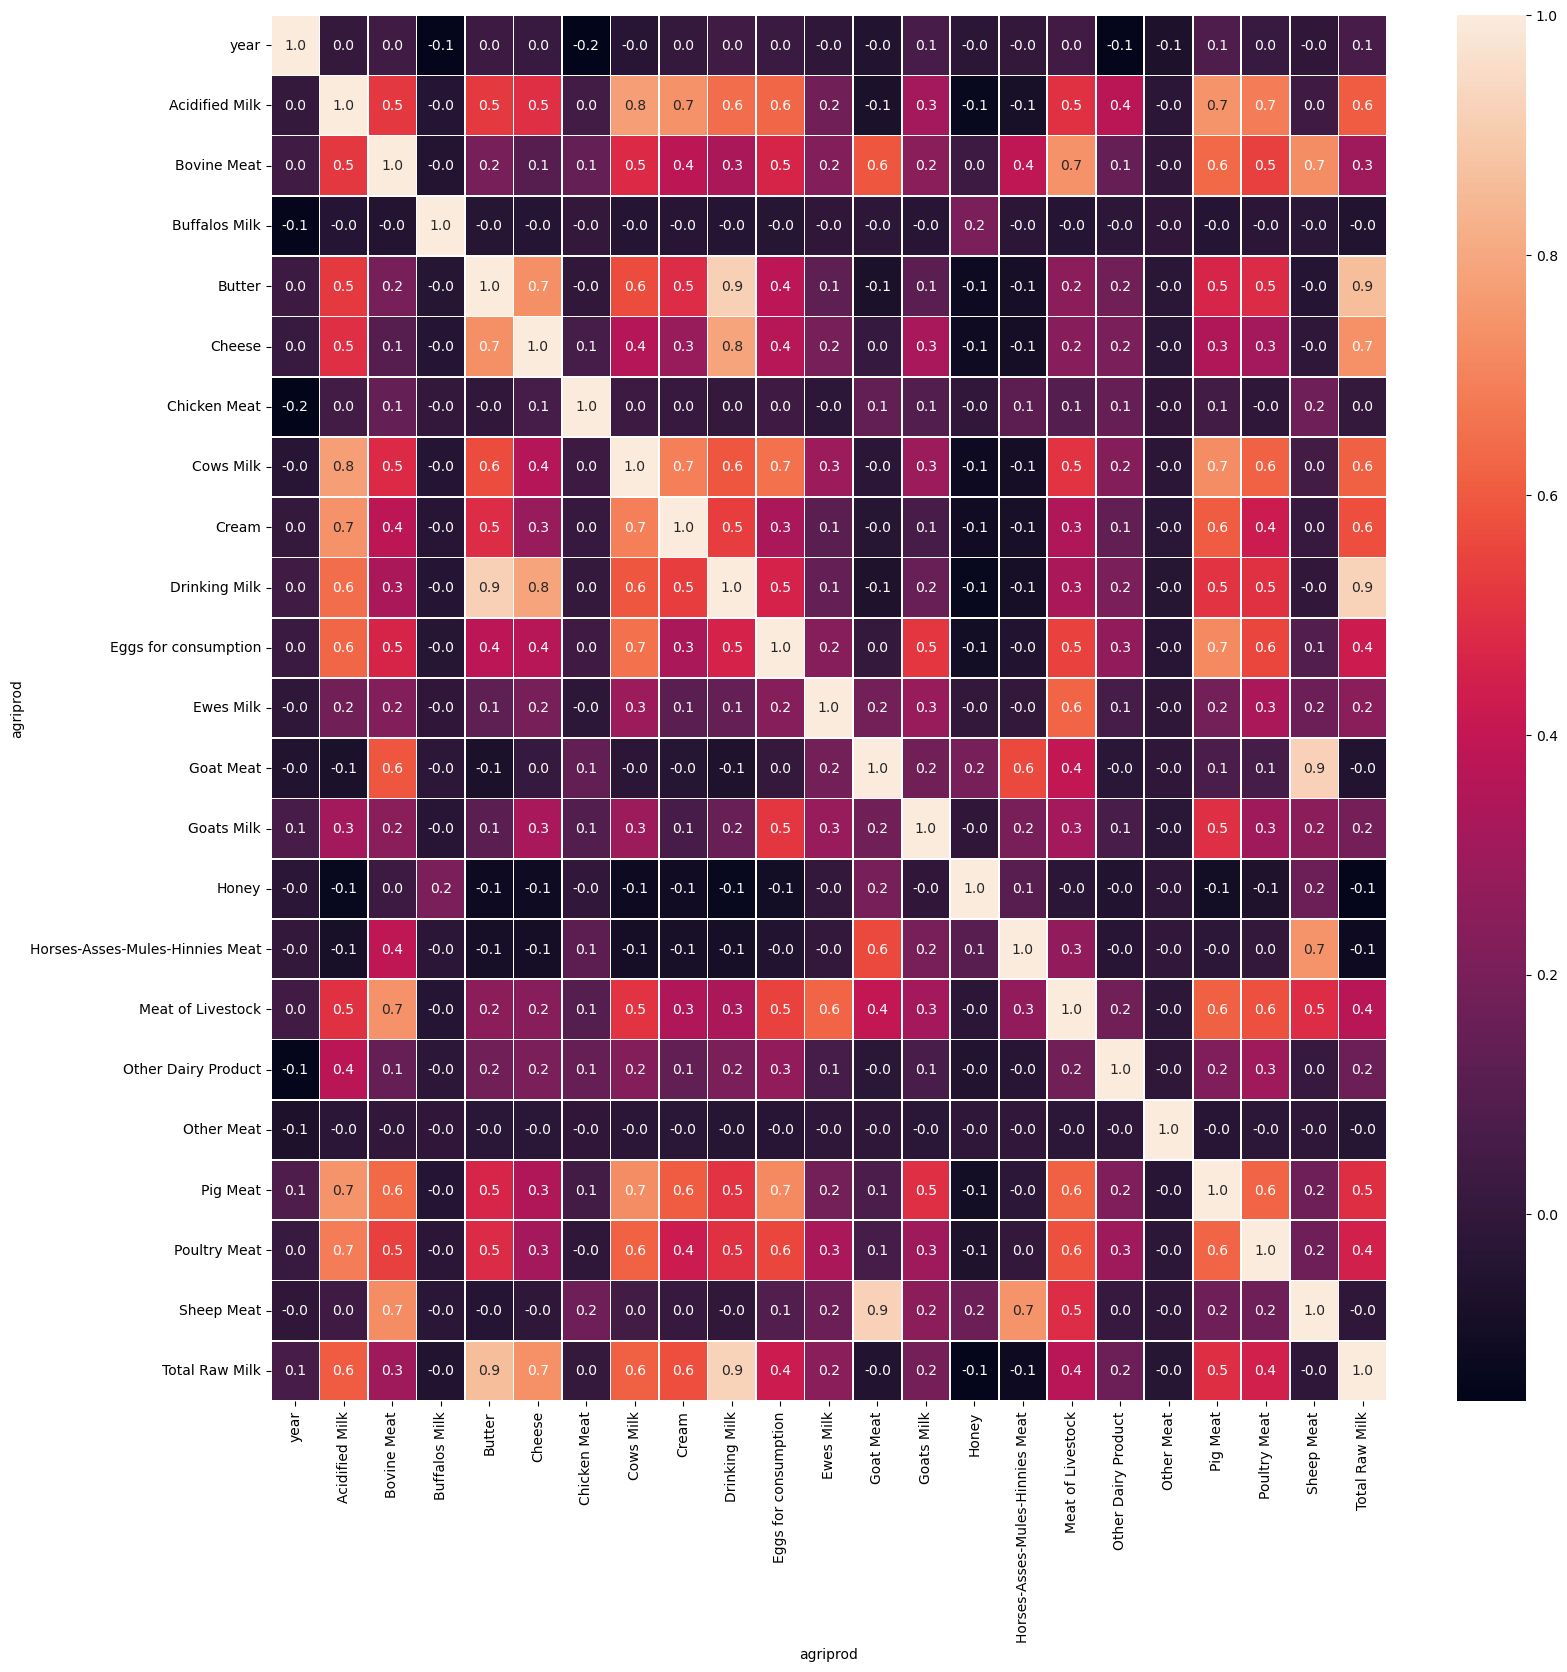

In [18]:
# Correlation heatmap
# a = df.loc[:,df.columns.str.contains("Milk")]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

When we look at the relationship between the amount of organic animal products in the last ten years;
    
* We can conclude that milk and dairy products have a strong positive correlation within themselves, due to the use of milk in the production of products such as cheese and butter.
    
* There is almost no relationship between "Buffolos Milk", "Chicken Meat", "Other Meat" products and other products.
    
* Since the correlation is zero, we can conclude that there is no linear relationship between these two products.

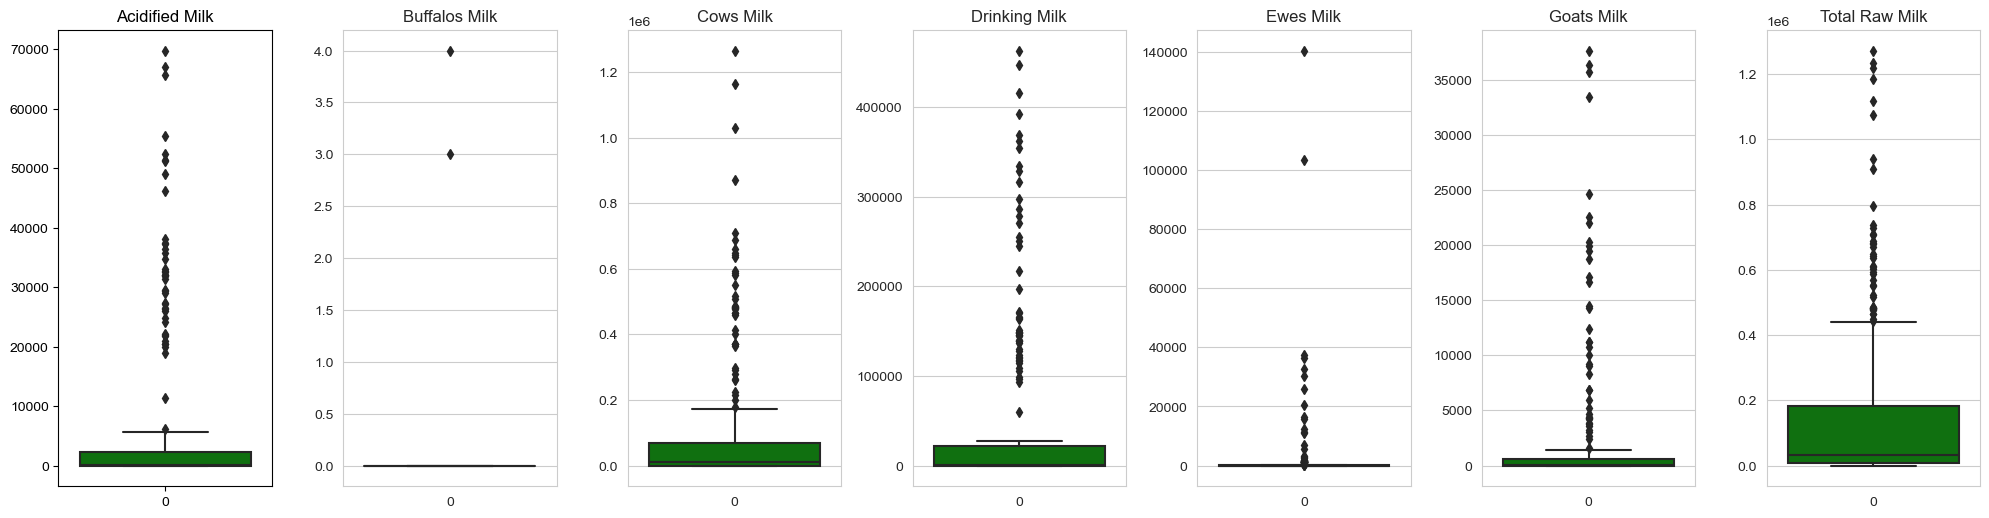

In [19]:
data = df.loc[:,df.columns.str.contains("Milk")]
l = data.columns.values
number_of_columns= len(data.columns)
number_of_rows = int(len(l)/number_of_columns)
plt.figure(figsize=(20,10))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    plt.title(l[i])
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

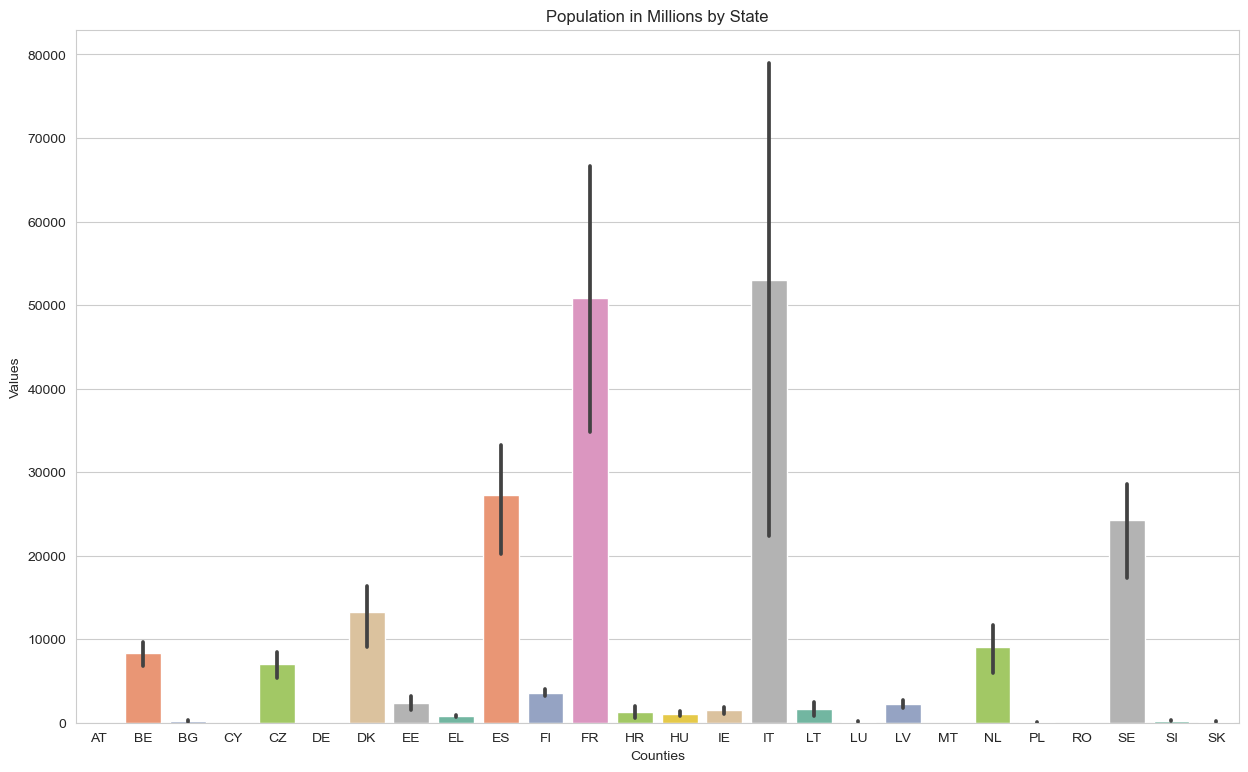

In [20]:
# Plot Population In Millions
fig, ax1 = plt.subplots()
fig.set_size_inches(15,  9)
  
ax1 = sns.barplot(x ="geo", y ='Meat of Livestock', 
                  data = df.sort_values('geo'), 
                                        palette ="Set2")
  
ax1.set(xlabel ='Counties', ylabel ='Values')
ax1.set_title('Meat of Livestock', size = 12)
  
plt.xticks(rotation =0)

In [22]:
#save the data results as csv
df.to_csv("org_aprod_structered.csv", sep=',',encoding='utf-8', index=False)

## Analysis: Organic operators by status of the registration process

data: https://ec.europa.eu/eurostat/databrowser/view/ORG_COPTYP/default/table

In [24]:
# Reading csv
org_op = pd.read_csv("org_coptyp_linear.csv",encoding="UTF-8")

In [25]:
# Dropping Redundant Column
org_op = org_op.drop(["DATAFLOW","LAST UPDATE","freq","unit", "OBS_FLAG"], axis=1)

index = org_op[ (org_op['operator'] != 'EXP') & (org_op['operator'] != 'IMP') & (org_op['operator'] != 'PRD_AGRI') & (org_op['operator'] != 'PRC')].index
org_op.drop(index , inplace=True)

#Dropping null values of OBS_VALUE
index = org_op.loc[org_op['OBS_VALUE'].isnull()].index
org_op.drop(index , inplace=True)

# Dropping the non EU countries 
nonEU = org_op.loc[(org_op['geo'] == 'IS')| (org_op['geo'] =='NO')| (org_op['geo'] =='UK')| (org_op['geo'] =='ME')| (org_op['geo'] =='MK')| (org_op['geo'] =='RS')| (org_op['geo'] =='TR')].index
org_op.drop(nonEU , inplace=True)

index = org_op[ (org_op['geo'] == "EU28") | (org_op['geo'] == "EU") | (org_op['geo'] == "EU27_2020")].index
org_op.drop(index,inplace = True)

In [26]:
org_op

,operator,procstat,geo,TIME_PERIOD,OBS_VALUE
0,EXP,REG_END,AL,2021,26.0
1,EXP,REG_END,AT,2014,9.0
2,EXP,REG_END,AT,2015,10.0
3,EXP,REG_END,AT,2016,10.0
4,EXP,REG_END,AT,2017,14.0
...,...,...,...,...,...
3094,PRD_AGRI,REG_WDN,RO,2015,3498.0
3095,PRD_AGRI,REG_WDN,RO,2016,3155.0
3096,PRD_AGRI,REG_WDN,RO,2017,3937.0
3097,PRD_AGRI,REG_WDN,SK,2014,20.0


In [27]:
op_df =org_op
op_df = op_df.pivot_table(index = [op_df.geo,op_df.TIME_PERIOD,op_df.procstat],
               columns = ['operator'],
               values = 'OBS_VALUE')
op_df.rename_axis(columns = None).reset_index()
op_df.reset_index(inplace=True)
op_df.fillna(0, inplace = True)
op_df

operator,geo,TIME_PERIOD,procstat,EXP,IMP,PRC,PRD_AGRI
0,AL,2021,REG_END,26.0,4.0,62.0,130.0
1,AT,2012,REG_END,0.0,0.0,0.0,21843.0
2,AT,2013,REG_END,0.0,14.0,2393.0,21863.0
3,AT,2014,REG_END,9.0,23.0,2118.0,22184.0
4,AT,2015,REG_END,10.0,55.0,1617.0,23070.0
...,...,...,...,...,...,...,...
361,SK,2017,REG_END,1.0,22.0,85.0,439.0
362,SK,2017,REG_NEW,0.0,0.0,0.0,35.0
363,SK,2017,REG_WDN,0.0,0.0,0.0,27.0
364,SK,2019,REG_END,19.0,44.0,142.0,567.0


In [28]:
#save the data results as csv
op_df.to_csv("org_operator_structured.csv", sep=',',encoding='utf-8', index=False)

In [29]:
op_df.isnull().sum()

operator
geo            0
TIME_PERIOD    0
procstat       0
EXP            0
IMP            0
PRC            0
PRD_AGRI       0
dtype: int64

In [30]:
op_df.procstat.value_counts()

REG_END    256
REG_NEW     55
REG_WDN     55
Name: procstat, dtype: int64

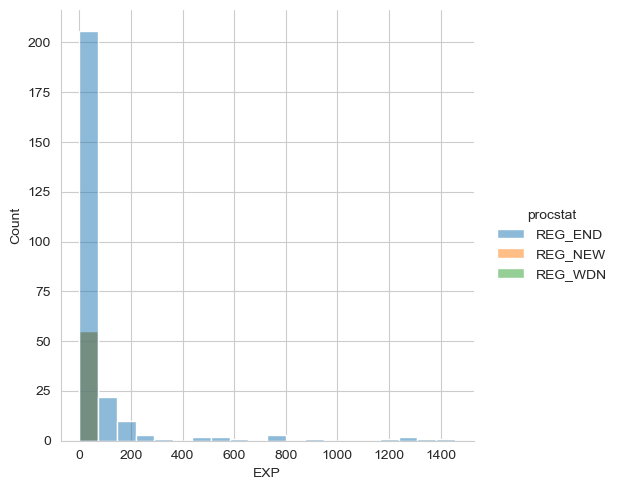

In [31]:
sns.displot(op_df, x="EXP", bins=20,hue="procstat")

In [32]:
op_df.describe()

operator,TIME_PERIOD,EXP,IMP,PRC,PRD_AGRI
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2016.166667,53.740437,99.950820,1399.213115,7560.177596
std,2.648770,184.375780,261.469667,3725.779367,12864.611861
min,2012.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,3.000000,39.250000,420.250000
50%,2016.000000,1.000000,14.000000,152.000000,2405.500000
75%,2018.000000,19.750000,67.500000,798.500000,5738.250000
max,2021.000000,1456.000000,1988.000000,22689.000000,71590.000000


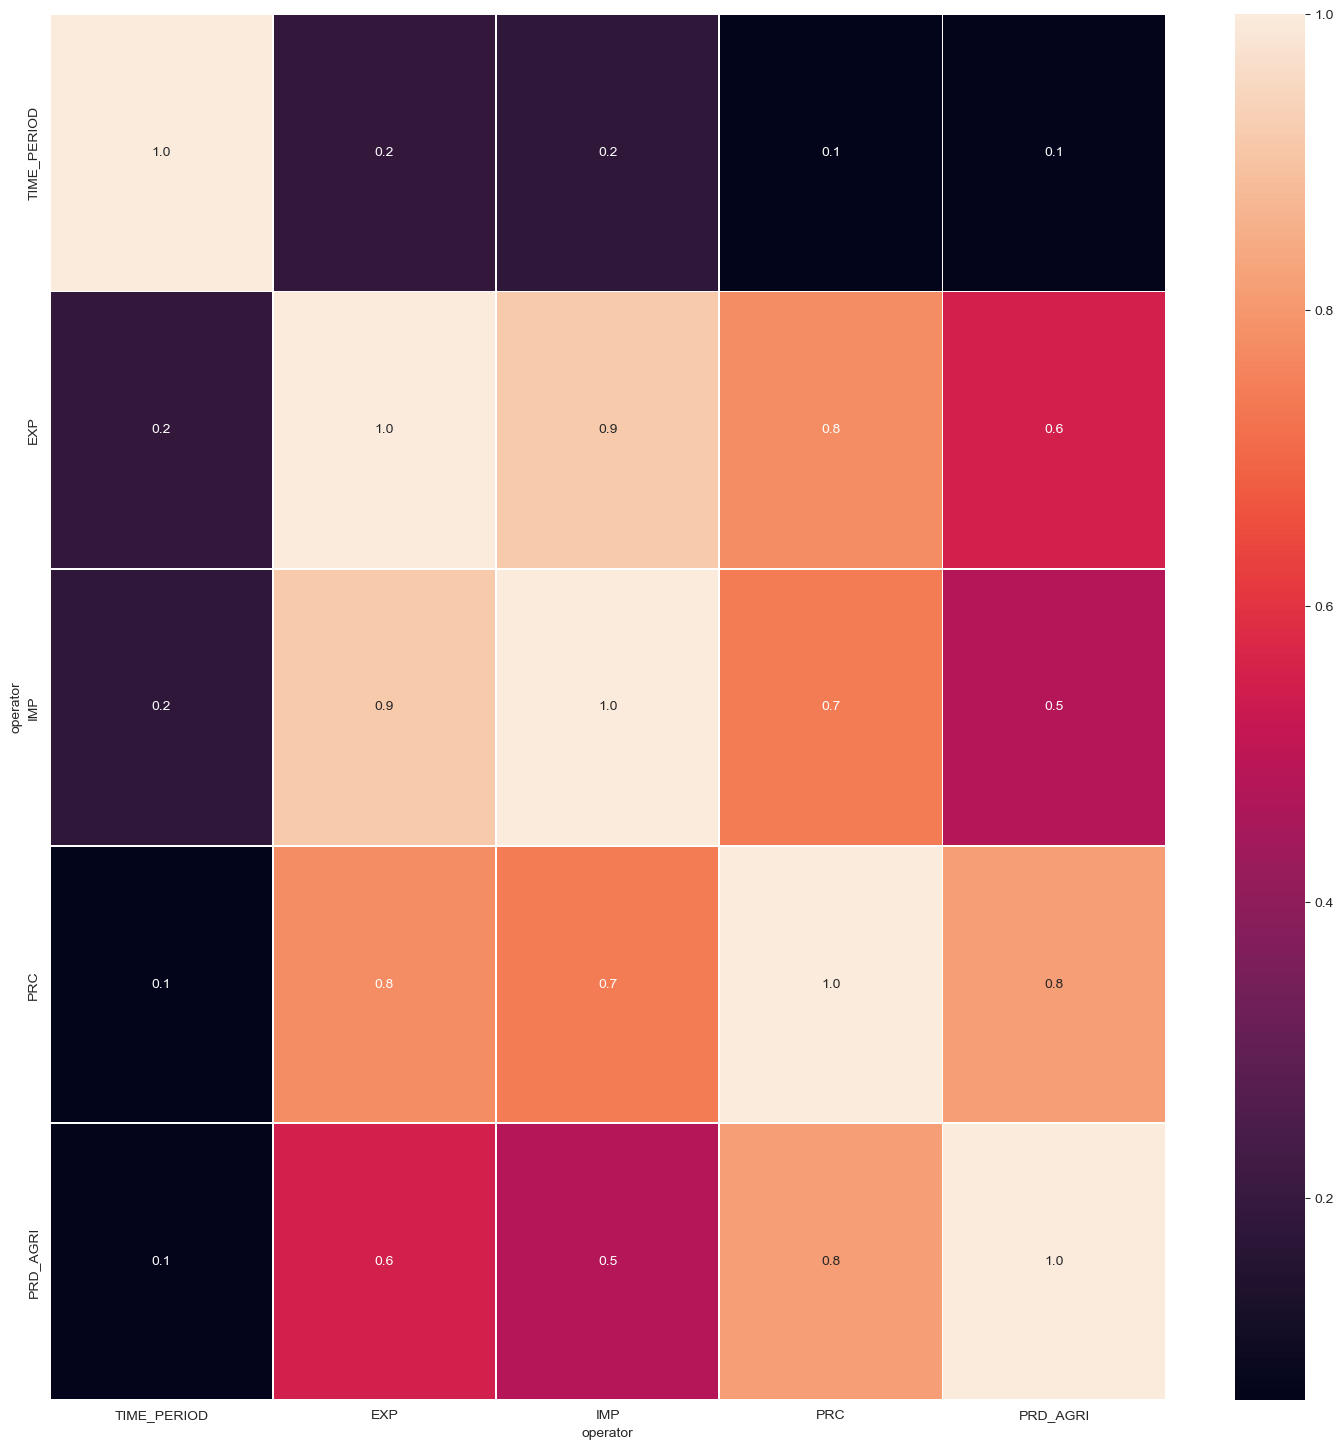

In [33]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(op_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [36]:
fig = px.bar(op_df, x='EXP', y='geo',color="TIME_PERIOD",
             labels={'geo':'Country','OBS_VALUE':'Observation Value', 'procstat': 'Status','TIME_PERIOD': 'Year' })
fig.show()

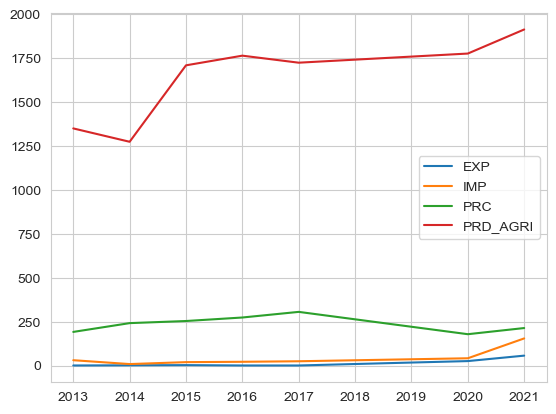

In [45]:
# Organic operators by status of the registration process for Ireland
data =op_df.loc[(op_df['geo'] =='IE') &  (op_df['procstat'] == "REG_END")]

plt.plot(data.TIME_PERIOD.tolist(), data.EXP.tolist(), label = "EXP")
plt.plot(data.TIME_PERIOD.tolist(), data.IMP.tolist(), label = "IMP")
plt.plot(data.TIME_PERIOD.tolist(), data.PRC.tolist(), label = "PRC")
plt.plot(data.TIME_PERIOD.tolist(), data.PRD_AGRI.tolist(), label = "PRD_AGRI")
plt.legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

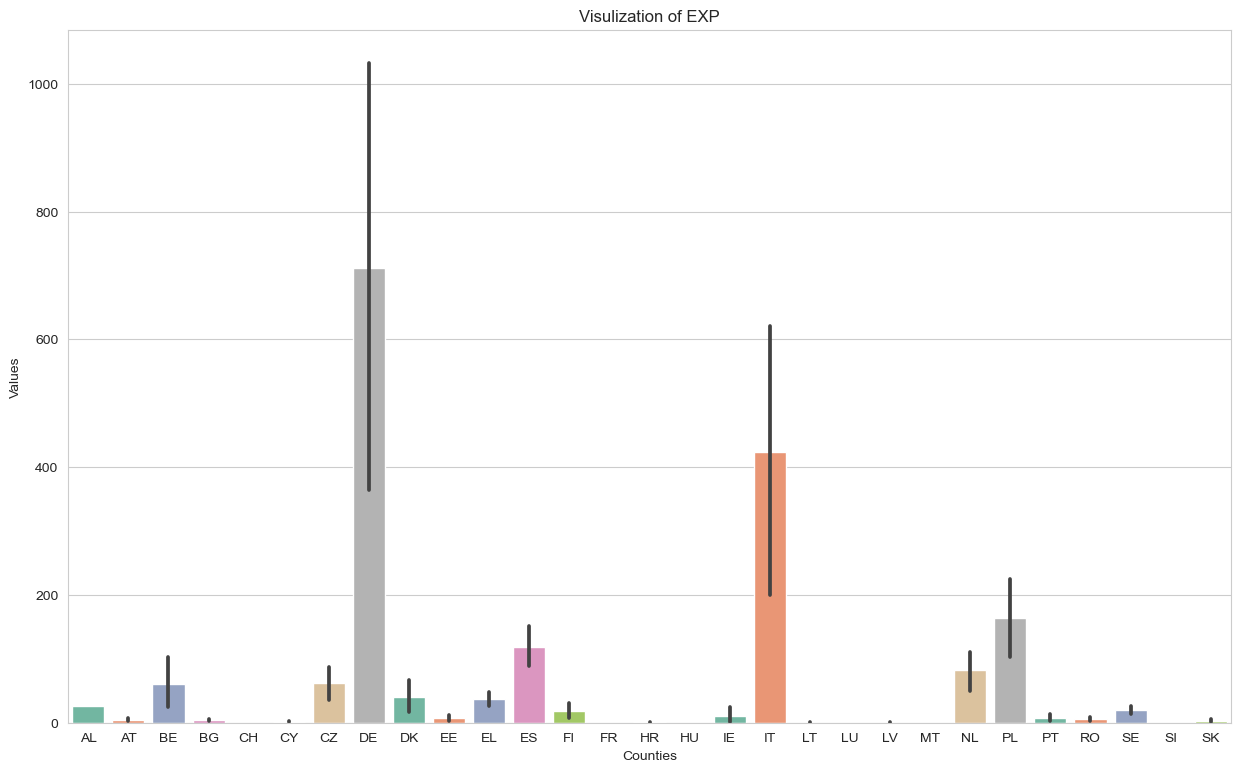

In [47]:
# Plot EXP values for countries
fig, ax1 = plt.subplots()
fig.set_size_inches(15,  9)
  
ax1 = sns.barplot(x ="geo", y ='EXP', 
                  data = op_df.sort_values('geo'), 
                                        palette ="Set2")
  
ax1.set(xlabel ='Counties', ylabel ='Values')
ax1.set_title('Visulization of EXP', size = 12)
  
plt.xticks(rotation =0)

<b>Population</b>
<p id=c>

data source: https://datatopics.worldbank.org/world-development-indicators/themes/people.html

In [48]:
pop_df = pd.read_csv("population_total.csv",encoding="UTF-8", index_col=False)

In [49]:
pop_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Population,total,SP.POP.TOTL,54208,55434,56234,56699,57029,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,Population,total,SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,Population,total,SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,Population,total,SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,Population,total,SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,Population,total,SP.POP.TOTL,947000,966000,994000,1022000,1050000,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
261,Yemen,YEM,Population,total,SP.POP.TOTL,5315351,5393034,5473671,5556767,5641598,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
262,South Africa,ZAF,Population,total,SP.POP.TOTL,17099836,17524533,17965733,18423157,18896303,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
263,Zambia,ZMB,Population,total,SP.POP.TOTL,3070780,3164330,3260645,3360099,3463211,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [50]:
# Dropping unnecessary columns
pop_df = pop_df.drop(pop_df.iloc[:, 1:56],axis = 1)
pop_df

,Country Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
261,Yemen,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
262,South Africa,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
263,Zambia,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [51]:
pop_df.rename(columns = {'Country Name':'geo'}, inplace = True)

eu = {'Austria' : 'AT', 'Belgium': 'BE', 'Bulgaria': 'BG', 'Croatia': 'HR', 'Cyprus': 'CY', 'Czech': 'CZ', 'Denmark': 'DK', 
      'Estonia': 'EE', 'Finland': 'FI', 'France': 'FR', 'Germany': 'DE', 'Greece': 'EL', 'Hungary': 'HU', 'Ireland': 'IE', 
      'Italy': 'IT', 'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT', 'Netherlands': 'NL', 'Poland': 'PL', 
      'Romania': 'RO', 'Slovakia': 'SK', 'Slovenia': 'SI', 'Spain': 'ES', 'Sweden': 'SE'}

for value, key in eu.items():
    pop_df.loc[pop_df['geo'].str.contains(value, case=False), 'geo'] = key
    
pop_df

,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
261,Yemen,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
262,South Africa,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
263,Zambia,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [52]:
# index = pop_df.loc[pop_df.geo.index.difference(eu.values()), :]
ix = [i for i in pop_df.geo if i not in eu.values()]
pop_df = pop_df.loc[~pop_df.geo.isin(ix)]

In [53]:
pop_df.reset_index(inplace=True, drop=True)
pop_df

,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0
1,BE,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11544241.0
2,BG,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0
3,CY,1124837.0,1135046.0,1143866.0,1152297.0,1160987.0,1170189.0,1179685.0,1189262.0,1198574.0,1207361.0
4,CZ,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10697858.0
5,DE,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0
6,DK,5570572.0,5591572.0,5614932.0,5643475.0,5683483.0,5728010.0,5764980.0,5793636.0,5814422.0,5831404.0
7,ES,46742697.0,46773055.0,46620045.0,46480882.0,46444832.0,46484062.0,46593236.0,46797754.0,47134837.0,47363419.0
8,EE,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1321977.0,1326855.0,1329479.0
9,FI,5388272.0,5413971.0,5438972.0,5461512.0,5479531.0,5495303.0,5508214.0,5515525.0,5521606.0,5529543.0


In [54]:
pop_df.describe()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,1.699164e+07,1.701894e+07,1.706395e+07,1.711028e+07,1.715048e+07,1.718926e+07,1.721787e+07,1.724738e+07,1.725830e+07,1.726894e+07
std,2.248053e+07,2.253979e+07,2.263997e+07,2.274063e+07,2.283334e+07,2.291666e+07,2.296637e+07,2.301058e+07,2.300516e+07,2.300990e+07
min,4.162680e+05,4.200280e+05,4.259670e+05,4.345580e+05,4.450530e+05,4.553560e+05,4.679990e+05,4.846300e+05,5.040620e+05,5.153320e+05
25%,3.028115e+06,2.987773e+06,2.957689e+06,2.932367e+06,2.904910e+06,2.868231e+06,2.828403e+06,2.801543e+06,2.794137e+06,2.794885e+06
50%,8.391643e+06,8.429991e+06,8.479823e+06,8.546356e+06,8.642699e+06,8.736668e+06,8.797566e+06,8.840521e+06,8.879920e+06,8.916864e+06
75%,1.669307e+07,1.675496e+07,1.680443e+07,1.686501e+07,1.693992e+07,1.703031e+07,1.713130e+07,1.723162e+07,1.734487e+07,1.744150e+07
max,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,8.234867e+07,8.265700e+07,8.290578e+07,8.309296e+07,8.316087e+07


In [56]:
#save the result data as csv
pop_df.to_csv("eu_population.csv", sep=',',encoding='utf-8', index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

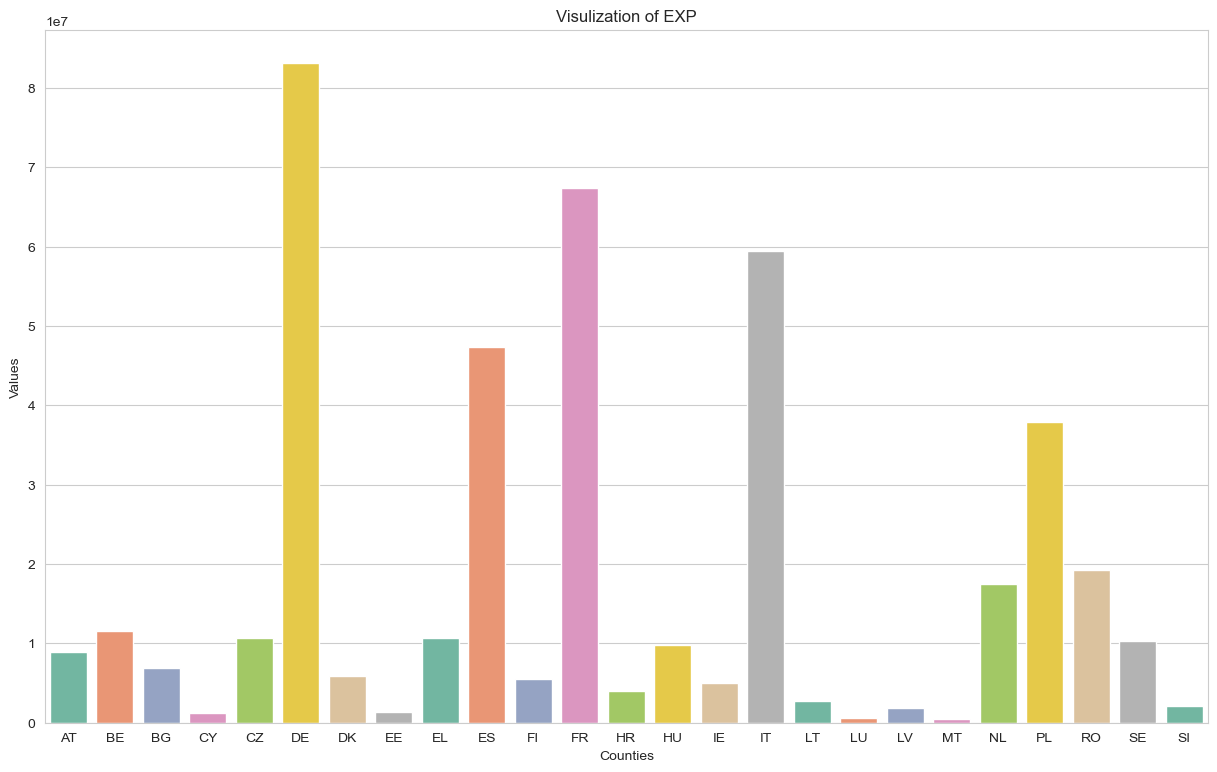

In [61]:
# Plot population of countries
fig, ax1 = plt.subplots()
fig.set_size_inches(15,  9)
  
ax1 = sns.barplot(x ="geo", y ='2021', 
                  data = pop_df.sort_values('geo'), 
                                        palette ="Set2")
  
ax1.set(xlabel ='Counties', ylabel ='Values')
ax1.set_title('Visulization of EXP', size = 12)
  
plt.xticks(rotation =0)

## Creating Dashboard
<p id =3>

In [84]:
pop_df=pd.read_csv("structured data/eu_population.csv",encoding="UTF-8")
org_farm_df= pd.read_csv("structured data/org_area_agriprod.csv",encoding='utf-8', )

In [211]:
# Make DataFrame Pipeline Interactive
idf=org_farm_df.interactive()
pop_idf = pop_df.interactive()

In [122]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2012, end=2022, step=1, value=2012)
year_slider

IntSlider(end=2022, name='Year slider', start=2012, value=2012)

In [178]:
# Radio buttons for the columns related to Milk
op_yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis operator', 
    options=org_farm_df.loc[:,org_farm_df.columns.str.contains("Milk")].columns.tolist(),
    button_type='success'
)

In [182]:
continents = org_farm_df['geo'].unique()

milk_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.geo.isin(continents))
    ]
    .groupby(['geo', 'year'])[op_yaxis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [189]:
milk_plot = milk_pipeline.hvplot(x='year', by = 'geo', y = op_yaxis, line_width=2, title='Milk')
milk_plot

In [187]:
m_yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis operator', 
    options=org_farm_df.loc[:,org_farm_df.columns.str.contains("Meat")].columns.tolist(),
    button_type='success'
)

continents = org_farm_df['geo'].unique()

meat_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.geo.isin(continents))
    ]
    .groupby(['geo', 'year'])[m_yaxis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [190]:
meat_plot = meat_pipeline.hvplot(x='year', by = 'geo', y = m_yaxis, line_width=2, title='Meat')
meat_plot

## Table

In [185]:
milk_table = milk_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
milk_table 

In [275]:
meat_table = meat_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
meat_table 

## Explorer

In [186]:
hvexplorer = hvplot.explorer(org_farm_df)
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes66300', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping66328', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels66349', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer66285', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations66369', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style66389'), x='index', y='geo', y_multi=[], z=None)

## Scatter Plot

In [278]:
scatter = idf.hvplot(by=['geo'], kind='scatter', title='Scatter', x='year', y=['area'])

## Bar chart

In [280]:
yaxis_pop = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=pop_df.iloc[:, 1:11].columns.tolist(), 
    button_type='success'
)

continents = pop_df.geo.unique()

co2_source_bar_pipeline = (
    idf_pop[
        
        (idf_pop.geo.isin(continents))
    ]
)


In [281]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='geo', 
                                                     y=yaxis_pop, 
                                                     title='')
co2_source_bar_plot

## Creating Dashboard

In [282]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Dashboard', 
    sidebar=[pn.pane.Markdown("# Organic Farming Production"), 
             pn.pane.Markdown("The livestock sector is of great importance for the sustainability of rural economies and many ecosystems. It also has a high environmental impact."), 
             pn.pane.PNG('animal.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Year"),   
             year_slider],
    main=[pn.Row(pn.Column(op_yaxis, 
                           milk_plot.panel(width=700), margin=(0,25)), 
                 milk_table.panel(width=500)), 
          pn.Row(pn.Column(m_yaxis, 
              meat_plot.panel(width=700), margin=(0,25))), 
          pn.pane.Markdown("#### Create your own plot"),
          pn.Row(pn.Column(hvexplorer, margin=(0,25)))
         ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

# Machine Learning Task

In [1]:
# Warning ignoring
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from plotly.subplots import make_subplots

import re,string, nltk
from textblob import TextBlob
from wordcloud import WordCloud

import snscrape.modules.twitter as twitter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sentiment Analysis
<p id=4>

In [32]:
# pip3 install snscrape
# Snscrape requires python = 3.8 or higher version
# If you want to use the development version:
# pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

container = []
keyword= '(price%20AND%20organic)'
for i, tweet in enumerate(twitter.TwitterSearchScraper(keyword + ' since:2022-07-01 until:2023-01-01 lang:"en" ').get_items()):
    tweets = {
            "tweet.username" : tweet.user.username,
            "tweet.content" : tweet.rawContent,
            "tweet.date" : tweet.date,
            "tweet.user.location" : tweet.user.location
            }   
    container.append([tweet.user.username, tweet.rawContent, tweet.date, tweet.user.location])

In [33]:
tweets_df = pd.DataFrame(container, columns=["User", "Content", "Date", "Location"])
tweets_df

,User,Content,Date,Location
0,itscreatinggood,Asking for a friend: If someone asked to grow ...,2022-12-31 23:30:25+00:00,"London, United Kingdom"
1,RaccoonHQYT,@itsdylanjenkins @Its_Waste This conversation ...,2022-12-31 23:01:57+00:00,"Owasso, OK"
2,Blue_JackSky,@vvaauussbb @JamesMelville Or live in a food d...,2022-12-31 22:56:35+00:00,
3,bestbrickprice,41444 Heartlake City Organic Café price change...,2022-12-31 22:33:11+00:00,
4,defi2dao,The #PiNetwork price listed on some exchanges ...,2022-12-31 22:32:02+00:00,Web5
...,...,...,...,...
8676,TD_Conspiracy,@thetzilla I don't think the current price of ...,2022-07-01 01:38:45+00:00,"Toronto, Ontario"
8677,thetzilla,Do you consider the current price action of BT...,2022-07-01 01:17:08+00:00,"Fukushima, Japan"
8678,Tuituituitui11,"It’s official, Fonterra’s organic farmers have...",2022-07-01 01:06:20+00:00,Matakana Island New Zealand
8679,TokuReset,"""Trading is NOT gambling ""\n\norganic price ac...",2022-07-01 00:41:49+00:00,


In [34]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text) #Removing mentions
    text = re.sub(r'#','',text) #Removing hashtag symbol
    text = re.sub(r'&amp;','',text) #Removing and symbol
    text = re.sub(r'\n',' ',text) #Removing new line
    text = re.sub(r'RT[\s]','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyper link
    text = text.lower()
    return text


def preprocess_text(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would",text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    return text

# Cleaning the text
tweets_df['Content'] = tweets_df['Content'].apply(preprocess_text)
tweets_df['Content'] = tweets_df['Content'].apply(cleantext)

tweets_df

,User,Content,Date,Location
0,itscreatinggood,asking for a friend: if someone asked to grow ...,2022-12-31 23:30:25+00:00,"London, United Kingdom"
1,RaccoonHQYT,this conversation is super confusing to foll...,2022-12-31 23:01:57+00:00,"Owasso, OK"
2,Blue_JackSky,or live in a food desert. unless you live ne...,2022-12-31 22:56:35+00:00,
3,bestbrickprice,41444 heartlake city organic café price change...,2022-12-31 22:33:11+00:00,
4,defi2dao,the pinetwork price listed on some exchanges n...,2022-12-31 22:32:02+00:00,Web5
...,...,...,...,...
8676,TD_Conspiracy,i don't think the current price of anything i...,2022-07-01 01:38:45+00:00,"Toronto, Ontario"
8677,thetzilla,do you consider the current price action of bt...,2022-07-01 01:17:08+00:00,"Fukushima, Japan"
8678,Tuituituitui11,"it is official, fonterra is organic farmers ha...",2022-07-01 01:06:20+00:00,Matakana Island New Zealand
8679,TokuReset,"""trading is not gambling "" organic price acti...",2022-07-01 00:41:49+00:00,


In [35]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create columns for subjectivity and polarity
tweets_df['Subjectivity'] = tweets_df['Content'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Content'].apply(getPolarity)

tweets_df

,User,Content,Date,Location,Subjectivity,Polarity
0,itscreatinggood,asking for a friend: if someone asked to grow ...,2022-12-31 23:30:25+00:00,"London, United Kingdom",0.600000,0.200000
1,RaccoonHQYT,this conversation is super confusing to foll...,2022-12-31 23:01:57+00:00,"Owasso, OK",0.587302,-0.161111
2,Blue_JackSky,or live in a food desert. unless you live ne...,2022-12-31 22:56:35+00:00,,0.460000,0.254545
3,bestbrickprice,41444 heartlake city organic café price change...,2022-12-31 22:33:11+00:00,,0.000000,0.000000
4,defi2dao,the pinetwork price listed on some exchanges n...,2022-12-31 22:32:02+00:00,Web5,0.628000,0.120000
...,...,...,...,...,...,...
8676,TD_Conspiracy,i don't think the current price of anything i...,2022-07-01 01:38:45+00:00,"Toronto, Ontario",0.525000,0.218750
8677,thetzilla,do you consider the current price action of bt...,2022-07-01 01:17:08+00:00,"Fukushima, Japan",0.250000,0.050000
8678,Tuituituitui11,"it is official, fonterra is organic farmers ha...",2022-07-01 01:06:20+00:00,Matakana Island New Zealand,0.255303,0.063258
8679,TokuReset,"""trading is not gambling "" organic price acti...",2022-07-01 00:41:49+00:00,,0.566667,-0.033333


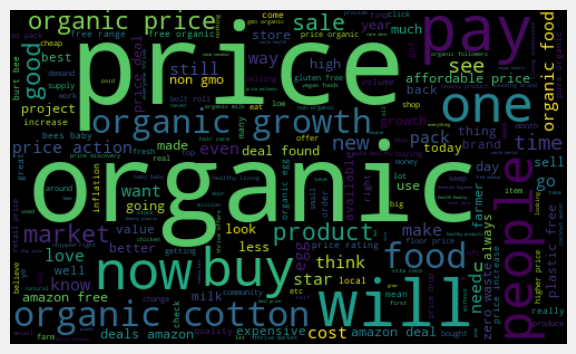

In [36]:
#Plotting Word Cloud
words = ' '.join([twt for twt in tweets_df['Content']])
wordCloud = WordCloud(width = 500, height=300, random_state = 42,max_font_size = 100).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
def getAnlaysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets_df['Analysis'] = tweets_df['Polarity'].apply(getAnlaysis)

In [38]:
sorted_df = tweets_df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, len(sorted_df)):
    if sorted_df['Analysis'][i] == 'Positive':
        print( i, '->' + sorted_df['Content'][i] + '\n')

0 ->asking for a friend: if someone asked to grow their tiktok from scratch, make 3 organic videos a week, and post 3-5 times a week on their socials, do you think $2,000/ month is a reasonable price?

2 ->  or live in a food desert. unless you live near or in a city organic isn't available at any price in too many places.

4 ->the pinetwork price listed on some exchanges now is heavily manipulated, not the real price traded by organic hands, people gets it for free, so there are massive circulation out there, no way price is that high. history always repeat itself!

5 -> a fun side effects of increasing fertilizer costs is that organic and regenerative food is now closer in price to conventional

7 ->is everyone else aware of the price of a head of organic cauliflower?? 8 dollars. more people should be talking about this!

9 ->  that we agree on.  the solutions(grow all your own food, more or less, or buy expensive organic and the most healthy options) are time consuming and expensive

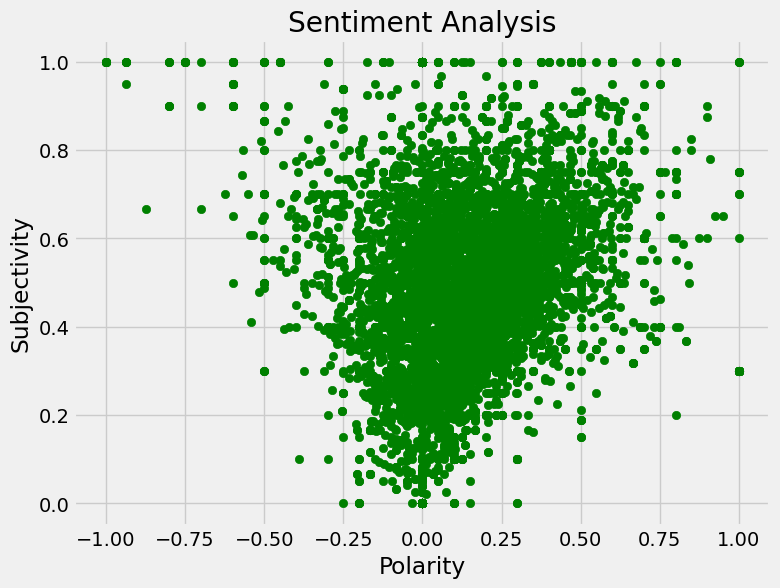

In [39]:
# Plot rhe polarity
plt.figure(figsize=(8,6))
for i in range(0,len(tweets_df)):
    plt.scatter(tweets_df['Polarity'][i], tweets_df['Subjectivity'][i], color = 'Green')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [40]:
tweets_df['Analysis'].value_counts()

Positive    5588
Negative    1550
Neutral     1543
Name: Analysis, dtype: int64

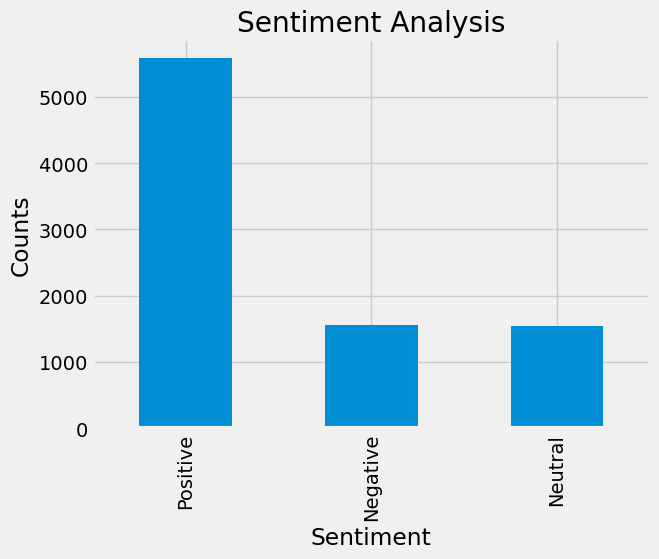

In [41]:
tweets_df.Analysis.value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df.Analysis.value_counts().plot(kind='bar')
plt.show()

In [42]:
# Save dataset
tweets_df.to_csv("org_tweets.csv", sep=',',encoding='utf-8', index=False)

## Classification and Regression with GridSearchCV
<p id=5>

In [43]:
TRAIN_SIZE = 0.8

vectorizer = TfidfVectorizer()

word_frequency = vectorizer.fit_transform(tweets_df.Content)
print('Size of vectorized words:' ,len(vectorizer.get_feature_names()))

sample_index = np.random.random(tweets_df.shape[0])

X_train, X_test = word_frequency[sample_index <= TRAIN_SIZE, :], word_frequency[sample_index > TRAIN_SIZE, :]

Y_train, Y_test = tweets_df.Analysis[sample_index <= TRAIN_SIZE], tweets_df.Analysis[sample_index > TRAIN_SIZE]

df_train, df_test = train_test_split(tweets_df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size: ", len(df_train))
print("TEST size: ", len(df_test))

Size of vectorized words: 19807
TRAIN size:  6944
TEST size:  1737


In [44]:
# Model training
rf = RandomForestClassifier(n_estimators = 30, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.6424766018718503

In [56]:
# GridSearchCV for RandomForestClassifier
grid = { 
    'n_estimators': [10,50],
    'max_features': ['log2','sqrt'],
    'criterion' :['gini', 'entropy']
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train,Y_train)

print("tuned hyperparameters: (best parameters): ",rf_cv.best_params_)
print("accuracy: ",rf_cv.best_score_)

tuned hyperparameters: (best parameters):  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
accuracy:  0.7134629229661626


In [57]:
# training with best params
rfc = RandomForestClassifier(max_features=rf_cv.best_params_['max_features'],
                                      n_estimators=rf_cv.best_params_['n_estimators'],
                                      criterion=rf_cv.best_params_['criterion'])
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=50)

In [58]:
preds = rfc.predict(X_test)
print(classification_report(Y_test, preds, labels=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.74      0.98      0.85      1126
    Negative       0.91      0.16      0.27       308
     Neutral       0.83      0.53      0.65       302

    accuracy                           0.76      1736
   macro avg       0.83      0.56      0.59      1736
weighted avg       0.79      0.76      0.71      1736



In [48]:
# GridSearchCV for Logistic Regression
grid = {
    "C":np.logspace(-3,3,7),
    "penalty":["l1","l2"],
    "multi_class"='multinomial'
}

lr = LogisticRegression()
lr_cv = GridSearchCV(lr,grid,cv = 5)
lr_cv.fit(X_train,Y_train)

print("tuned hyperparameters: (best parameters): ",lr_cv.best_params_)
print("accuracy: ",lr_cv.best_score_)

tuned hyperparameters: (best parameters):  {'C': 1000.0, 'penalty': 'l2'}
accuracy:  0.7913606911447084


In [52]:
# training with best params
logr = LogisticRegression(C=lr_cv.best_params_['C'],
                                      penalty=lr_cv.best_params_['penalty'])
logr.fit(X_train,Y_train)

LogisticRegression(C=1000.0)

In [55]:
preds = logr.predict(X_test)
print(classification_report(Y_test, preds, labels=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.85      0.94      0.89      1126
    Negative       0.75      0.56      0.64       308
     Neutral       0.81      0.72      0.76       302

    accuracy                           0.83      1736
   macro avg       0.80      0.74      0.77      1736
weighted avg       0.83      0.83      0.83      1736



## Unsupervised Learning: Clustering
<p id=6>

In [67]:
org_df = pd.read_csv("org_aprod_structered.csv",encoding="UTF-8")
org_df

,geo,year,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,...,Goats Milk,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Sheep Meat,Total Raw Milk
0,AT,2014,29591.0,0.0,0.0,3586.0,30736.0,0.0,635751.0,4645.0,...,0.0,0.0,0.0,0.0,2971.0,0.0,0.0,0.0,0.0,443486.0
1,AT,2015,26449.0,0.0,0.0,3793.0,29930.0,0.0,642340.0,5591.0,...,0.0,0.0,0.0,0.0,3200.0,0.0,0.0,0.0,0.0,440924.0
2,AT,2016,31950.0,0.0,0.0,3792.0,28312.0,0.0,661688.0,5040.0,...,0.0,0.0,0.0,0.0,3174.0,0.0,0.0,0.0,0.0,552389.0
3,AT,2017,32126.0,0.0,0.0,4070.0,30834.0,0.0,0.0,5694.0,...,0.0,0.0,0.0,0.0,3043.0,0.0,0.0,0.0,0.0,612629.0
4,AT,2018,37354.0,0.0,0.0,4822.0,31836.0,0.0,0.0,7524.0,...,0.0,0.0,0.0,0.0,3803.0,0.0,0.0,0.0,0.0,635751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,SK,2016,98.0,0.0,0.0,11.0,656.0,0.0,15349.0,0.0,...,48.0,1.0,0.0,175.0,23.0,0.0,0.0,0.0,194.0,16536.0
236,SK,2017,32.0,0.0,0.0,24.0,139.0,0.0,19184.0,0.0,...,57.0,4.0,0.0,237.0,16.0,0.0,7.0,0.0,0.0,21140.0
237,SK,2018,30.0,0.0,0.0,19.0,79.0,0.0,24811.0,0.0,...,101.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,25998.0
238,SK,2019,50.0,0.0,0.0,25.0,170.0,0.0,0.0,0.0,...,0.0,0.0,0.0,53.0,55.0,0.0,0.0,0.0,0.0,19598.0


In [63]:
# # Calculate the mean value of last ten year for each column
# org_df = org_df.groupby('geo').mean()
# org_df.reset_index(inplace=True)
# # Dropping year column
# org_df = org_df.drop(["year"], axis=1)
# org_df

,geo,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,Drinking Milk,...,Goats Milk,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Sheep Meat,Total Raw Milk
0,AT,24158.875000,0.000000,0.0,3041.375000,23245.250000,0.000000,242472.375000,4606.375000,95824.125000,...,0.000000,0.000000,0.000000,0.000000,2023.875000,0.000000,0.000000,0.000000,0.000000,497110.875000
1,BE,0.000000,1798.600000,0.0,0.000000,0.000000,0.000000,113323.200000,0.000000,0.000000,...,3743.600000,0.000000,0.000000,8299.200000,0.000000,0.000000,1269.400000,4787.200000,444.000000,117066.800000
2,BG,317.600000,163.700000,0.4,5.700000,198.500000,0.000000,4979.300000,9.500000,275.200000,...,927.900000,2471.000000,0.000000,189.200000,88.100000,1.200000,1.900000,1.800000,24.200000,6787.400000
3,CY,251.600000,0.000000,0.0,0.000000,220.800000,0.000000,1318.200000,0.000000,675.400000,...,1045.700000,0.000000,0.000000,14.700000,13.200000,0.000000,0.000000,8.300000,0.000000,2493.700000
4,CZ,108.600000,7190.400000,0.0,2.700000,100.900000,0.000000,32152.600000,17.600000,287.600000,...,127.700000,5.800000,0.100000,7062.300000,34.200000,0.900000,150.800000,153.800000,437.400000,32325.600000
5,DE,0.000000,0.000000,0.0,14313.600000,46471.300000,0.000000,126621.900000,0.000000,344967.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,933949.800000
6,DK,24661.666667,6185.222222,0.0,7476.000000,7656.444444,0.000000,493261.222222,8320.333333,158757.222222,...,0.000000,0.000000,0.000000,13200.888889,0.000000,0.000000,8702.333333,0.000000,0.000000,574118.555556
7,EE,89.100000,2364.700000,0.0,1.600000,188.400000,0.300000,9085.800000,12.700000,591.300000,...,119.000000,41.700000,5.600000,2321.000000,496.400000,2.200000,44.800000,14.400000,251.800000,9204.900000
8,EL,1102.333333,0.000000,0.0,34.333333,6625.222222,0.000000,0.000000,114.888889,10057.333333,...,0.000000,0.000000,0.000000,781.777778,0.000000,0.000000,0.000000,0.000000,0.000000,61299.000000
9,ES,1974.800000,19708.100000,0.0,88.800000,799.700000,163.400000,25268.300000,17.100000,14017.100000,...,9863.400000,945.300000,414.700000,27300.100000,202.200000,0.300000,1741.800000,1269.400000,8090.500000,37703.300000


In [69]:
# Selecting features
x = org_df.iloc[:, [11, 17, 23]].values

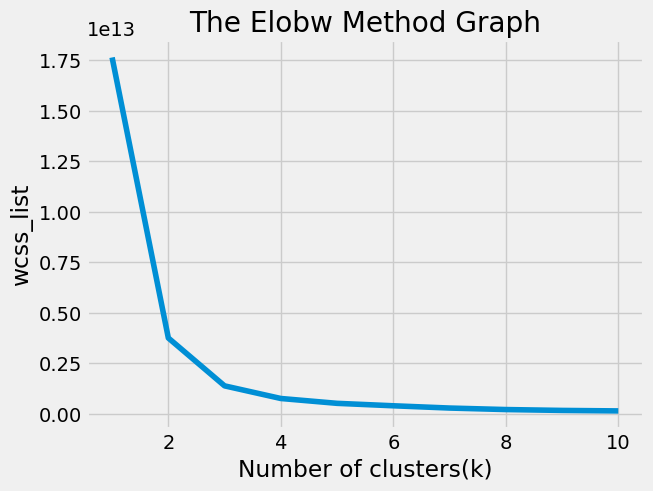

In [71]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#finding optimal number of clusters using the elbow method  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

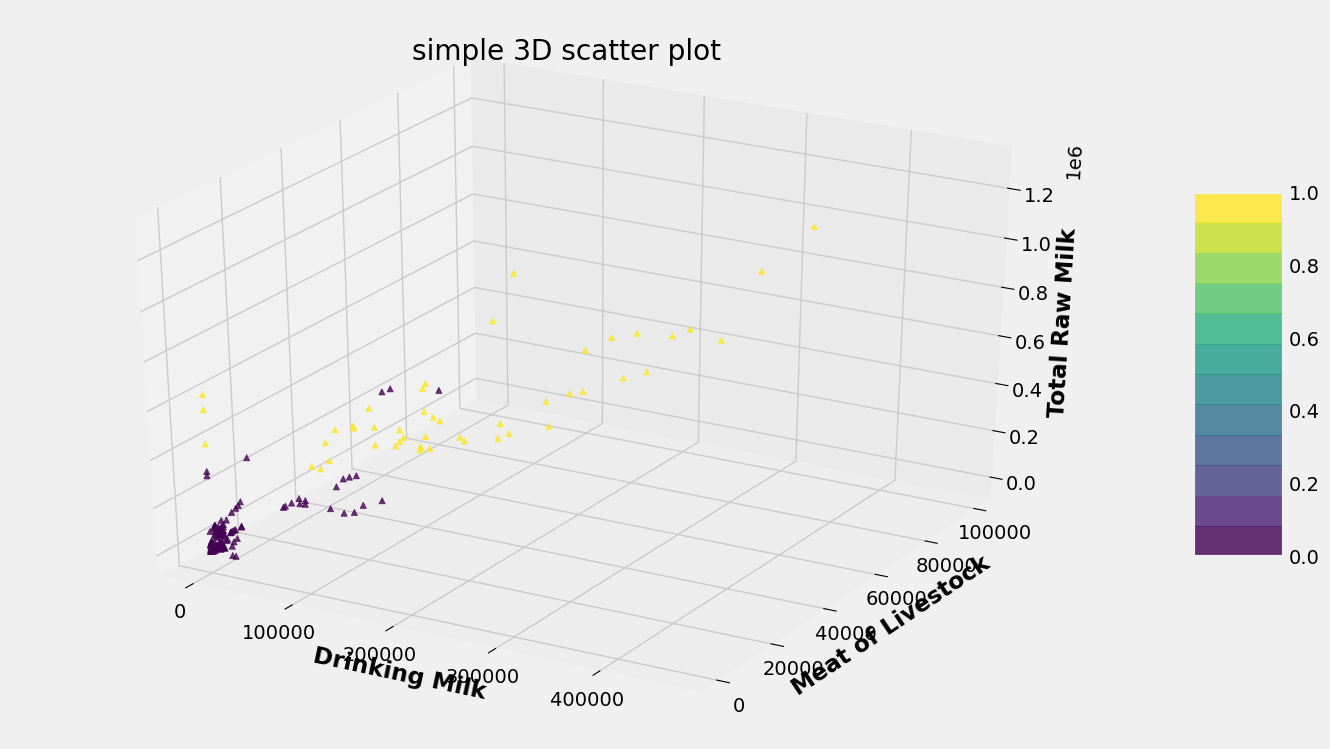

In [75]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  


y_predict= kmeans.fit_predict(x)

#visulaizing the clusters  
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('viridis', 12)

sctt = ax.scatter3D(org_df['Drinking Milk'],org_df['Meat of Livestock'], org_df['Total Raw Milk'],
                    alpha = 0.8,
                    c = y_predict,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Drinking Milk', fontweight ='bold')
ax.set_ylabel('Meat of Livestock', fontweight ='bold')
ax.set_zlabel('Total Raw Milk', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 4)
 
# show plot
plt.show()

In [76]:
kmeans.cluster_centers_

array([[3.28373927e+00, 4.16317708e+03, 4.29697917e+04],
       [2.03177879e+01, 2.05276458e+04, 6.44031104e+05]])

In [79]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
clustered = org_df

clustered['Cluster'] = y_predict

In [83]:
clustered

,geo,year,Acidified Milk,Bovine Meat,Buffalos Milk,Butter,Cheese,Chicken Meat,Cows Milk,Cream,...,Honey,Horses-Asses-Mules-Hinnies Meat,Meat of Livestock,Other Dairy Product,Other Meat,Pig Meat,Poultry Meat,Sheep Meat,Total Raw Milk,Cluster
0,AT,2014,29591.0,0.0,0.0,3586.0,30736.0,0.0,635751.0,4645.0,...,0.0,0.0,0.0,2971.0,0.0,0.0,0.0,0.0,443486.0,1
1,AT,2015,26449.0,0.0,0.0,3793.0,29930.0,0.0,642340.0,5591.0,...,0.0,0.0,0.0,3200.0,0.0,0.0,0.0,0.0,440924.0,1
2,AT,2016,31950.0,0.0,0.0,3792.0,28312.0,0.0,661688.0,5040.0,...,0.0,0.0,0.0,3174.0,0.0,0.0,0.0,0.0,552389.0,1
3,AT,2017,32126.0,0.0,0.0,4070.0,30834.0,0.0,0.0,5694.0,...,0.0,0.0,0.0,3043.0,0.0,0.0,0.0,0.0,612629.0,1
4,AT,2018,37354.0,0.0,0.0,4822.0,31836.0,0.0,0.0,7524.0,...,0.0,0.0,0.0,3803.0,0.0,0.0,0.0,0.0,635751.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,SK,2016,98.0,0.0,0.0,11.0,656.0,0.0,15349.0,0.0,...,1.0,0.0,175.0,23.0,0.0,0.0,0.0,194.0,16536.0,0
236,SK,2017,32.0,0.0,0.0,24.0,139.0,0.0,19184.0,0.0,...,4.0,0.0,237.0,16.0,0.0,7.0,0.0,0.0,21140.0,0
237,SK,2018,30.0,0.0,0.0,19.0,79.0,0.0,24811.0,0.0,...,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,25998.0,0
238,SK,2019,50.0,0.0,0.0,25.0,170.0,0.0,0.0,0.0,...,0.0,0.0,53.0,55.0,0.0,0.0,0.0,0.0,19598.0,0


In [84]:
#save the data with results as csv
clustered.to_csv("org_clustering.csv", sep=',',encoding='utf-8', index=False)

## Forecasting: organic operators by status of the registration process
<p id=7>
data: https://ec.europa.eu/eurostat/databrowser/view/ORG_COPTYP/default/table

In [8]:
# Reading csv
org_op = pd.read_csv("org_coptyp_linear.csv",encoding="UTF-8")

In [9]:
# Dropping Redundant Column
org_op = org_op.drop(["DATAFLOW","LAST UPDATE","freq","unit", "OBS_FLAG"], axis=1)

index = org_op.loc[org_op['OBS_VALUE'].isnull()].index
org_op.drop(index , inplace=True)

In [10]:
index1 = org_op[ (org_op['operator'] != 'EXP') & (org_op['operator'] != 'IMP') & (org_op['operator'] != 'PRD_AGRI') & (org_op['operator'] != 'PRC')].index
org_op.drop(index1 , inplace=True)
index2 = org_op[ (org_op['geo'] == "EU28") | (org_op['geo'] == "EU") | (org_op['geo'] == "EU27_2020")].index
org_op.drop(index2,inplace = True)

In [19]:
org_op

,operator,procstat,geo,TIME_PERIOD,OBS_VALUE
0,EXP,REG_END,AL,2021,26.0
1,EXP,REG_END,AT,2014,9.0
2,EXP,REG_END,AT,2015,10.0
3,EXP,REG_END,AT,2016,10.0
4,EXP,REG_END,AT,2017,14.0
...,...,...,...,...,...
1583,PRD_AGRI,REG_WDN,RO,2015,3498.0
1584,PRD_AGRI,REG_WDN,RO,2016,3155.0
1585,PRD_AGRI,REG_WDN,RO,2017,3937.0
1586,PRD_AGRI,REG_WDN,SK,2014,20.0


In [12]:
org_op = org_op.reset_index(drop=True)

In [9]:
data = org_op.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = org_op.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1429, 5)
Unseen Data For Predictions: (159, 5)


In [10]:
# initialize setup
#s = setup(data = train, test_data = test, target = 'OBS_VALUE', fold_strategy = 'timeseries', numeric_features = ['TIME_PERIOD'], fold = 5, transform_target = True, session_id = 123)
exp_reg101 = setup(data = data, target = 'OBS_VALUE', session_id=123) 

,Description,Value
0,session_id,123
1,Target,OBS_VALUE
2,Original Data,"(1429, 5)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1000, 53)"


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,578.2900,4777970.1592,1964.6694,0.9336,0.9348,1.4884,0.1050
et,Extra Trees Regressor,589.0774,4356662.2027,1996.5270,0.9216,0.9323,1.1201,0.1140
dt,Decision Tree Regressor,606.5220,4923257.3980,2098.6800,0.9074,0.9560,1.1744,0.0060
gbr,Gradient Boosting Regressor,1061.5617,5331593.9294,2253.0346,0.9043,2.7062,24.1691,0.0230
lightgbm,Light Gradient Boosting Machine,3086.7528,42460992.1782,6203.0359,0.3794,3.5815,80.8107,0.0120
knn,K Neighbors Regressor,2514.1144,43670735.2000,6342.3696,0.3325,2.1419,21.9201,0.0080
br,Bayesian Ridge,3685.4042,44115625.2017,6392.3085,0.3198,4.1700,196.0250,0.0060
ridge,Ridge Regression,3782.9319,44040675.6000,6409.0405,0.3083,4.2336,206.9595,0.0050
llar,Lasso Least Angle Regression,3780.4700,44158179.4058,6429.0889,0.3008,4.2343,203.4153,0.0060
lasso,Lasso Regression,3838.8184,44186230.4000,6434.7610,0.2976,4.2602,212.2470,0.1980


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [12]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,482.0885,2680911.5269,1637.3489,0.9420,1.0105,3.0832
1,1280.4196,16639799.9789,4079.1911,0.8854,1.0405,1.1147
2,797.7002,7600408.0145,2756.8838,0.8852,0.7548,1.4493
3,580.8318,3800459.0854,1949.4766,0.8423,0.8437,1.5932
4,502.7207,2526422.8063,1589.4725,0.9544,0.7054,0.7413
5,272.2601,621123.4366,788.1138,0.9726,0.8645,1.1515
6,692.8450,8877406.2419,2979.4976,0.9401,0.9710,1.4037
7,429.3335,1284442.1964,1133.3323,0.9693,0.8553,1.0207
8,445.0072,2095187.7992,1447.4764,0.9747,1.2977,1.4999


In [13]:
predictions_future = predict_model(rf)
predictions_future

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,653.5808,5512062.4154,2347.7782,0.9465,0.8340,1.4499


,operator_EXP,operator_IMP,operator_PRC,operator_PRD_AGRI,procstat_REG_END,procstat_REG_NEW,procstat_REG_WDN,geo_AL,geo_AT,geo_BE,...,TIME_PERIOD_2014,TIME_PERIOD_2015,TIME_PERIOD_2016,TIME_PERIOD_2017,TIME_PERIOD_2018,TIME_PERIOD_2019,TIME_PERIOD_2020,TIME_PERIOD_2021,OBS_VALUE,Label
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.21
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.10
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,10.26
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.38
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,70.64
425,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8518.0,11296.23
426,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,161.0,200.32
427,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,11.92


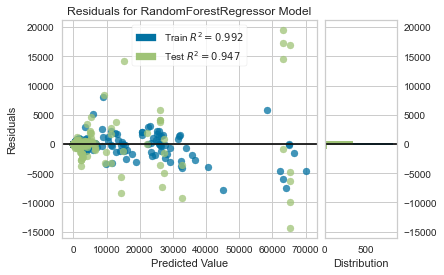

In [14]:
plot_model(rf)

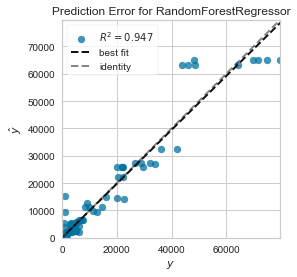

In [15]:
plot_model(rf, plot = 'error')

In [16]:
predictions_future = predict_model(rf,data = data_unseen)
predictions_future

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,673.9083,6211910.7731,2492.3705,0.9765,1.0642,2.9203


,operator,procstat,geo,TIME_PERIOD,OBS_VALUE,Label
0,PRD_AGRI,REG_END,SI,2016,3513.0,3525.64
1,PRD_AGRI,REG_END,SI,2017,3627.0,3595.41
2,PRD_AGRI,REG_END,SI,2018,3738.0,3644.61
3,PRD_AGRI,REG_END,SI,2019,3823.0,3713.93
4,PRD_AGRI,REG_END,SI,2020,3685.0,3611.04
...,...,...,...,...,...,...
154,PRD_AGRI,REG_WDN,RO,2015,3498.0,3319.85
155,PRD_AGRI,REG_WDN,RO,2016,3155.0,3403.88
156,PRD_AGRI,REG_WDN,RO,2017,3937.0,3659.06
157,PRD_AGRI,REG_WDN,SK,2014,20.0,45.22


In [17]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,600.6376,4260956.9119,2064.2085,0.9078,1.0387,1.8540
1,752.1379,4031670.0886,2007.9019,0.9722,1.0025,0.9215
2,810.7523,8796984.4756,2965.9711,0.8672,0.7828,0.9385
3,671.3521,4855662.0899,2203.5567,0.7985,0.9807,1.5115
4,601.7610,4689330.6764,2165.4862,0.9153,0.8443,0.5278
5,242.1475,667417.0788,816.9560,0.9706,0.7113,0.5839
6,635.6633,7261144.5563,2694.6511,0.9510,1.0347,1.2822
7,716.8019,4258455.4454,2063.6025,0.8983,0.8326,0.5432
8,570.1656,3520152.7125,1876.2070,0.9574,0.9996,1.4652


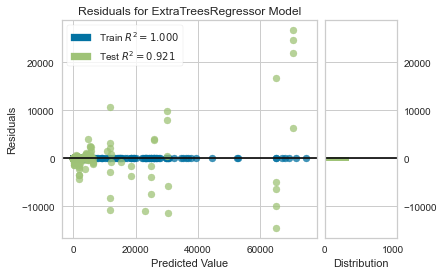

In [18]:
plot_model(et)

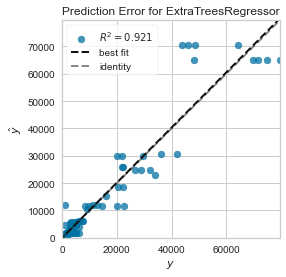

In [19]:
plot_model(et, plot = 'error')

In [20]:
predictions_future = predict_model(et,data = data_unseen)
predictions_future

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,453.1636,4905721.4769,2214.8863,0.9815,0.5729,0.7591


,operator,procstat,geo,TIME_PERIOD,OBS_VALUE,Label
0,PRD_AGRI,REG_END,SI,2016,3513.0,3513.00
1,PRD_AGRI,REG_END,SI,2017,3627.0,3627.00
2,PRD_AGRI,REG_END,SI,2018,3738.0,3738.00
3,PRD_AGRI,REG_END,SI,2019,3823.0,3823.00
4,PRD_AGRI,REG_END,SI,2020,3685.0,3778.80
...,...,...,...,...,...,...
154,PRD_AGRI,REG_WDN,RO,2015,3498.0,3569.46
155,PRD_AGRI,REG_WDN,RO,2016,3155.0,3155.00
156,PRD_AGRI,REG_WDN,RO,2017,3937.0,3937.00
157,PRD_AGRI,REG_WDN,SK,2014,20.0,20.00


### Creating feature data and forecasting

In [21]:
geo = org_op.geo.unique()
operator = org_op.operator.unique()
procstat = org_op.procstat.unique()

In [30]:
ft_data = pd.DataFrame()
for i in geo:
    for j in operator:
        for k in procstat:
            # Insert Dict to the dataframe using DataFrame.append()
            new_row = {'operator':j, 'procstat':k, 'geo':i, 'TIME_PERIOD':2022, 'OBS_VALUE': "-"}
            ft_data = ft_data.append(new_row, ignore_index=True)

In [34]:
ft_data

,operator,procstat,geo,TIME_PERIOD,OBS_VALUE
0,EXP,REG_END,AL,2022,-
1,EXP,REG_NEW,AL,2022,-
2,EXP,REG_WDN,AL,2022,-
3,IMP,REG_END,AL,2022,-
4,IMP,REG_NEW,AL,2022,-
...,...,...,...,...,...
427,PRC,REG_NEW,CH,2022,-
428,PRC,REG_WDN,CH,2022,-
429,PRD_AGRI,REG_END,CH,2022,-
430,PRD_AGRI,REG_NEW,CH,2022,-


In [32]:
predictions_future = predict_model(et,data = ft_data)
predictions_future

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0,0,0,0,0,0


,operator,procstat,geo,TIME_PERIOD,OBS_VALUE,Label
0,EXP,REG_END,AL,2022,-,26.00
1,EXP,REG_NEW,AL,2022,-,26.00
2,EXP,REG_WDN,AL,2022,-,26.00
3,IMP,REG_END,AL,2022,-,4.00
4,IMP,REG_NEW,AL,2022,-,4.00
...,...,...,...,...,...,...
427,PRC,REG_NEW,CH,2022,-,12.48
428,PRC,REG_WDN,CH,2022,-,5.65
429,PRD_AGRI,REG_END,CH,2022,-,7670.00
430,PRD_AGRI,REG_NEW,CH,2022,-,100.67


In [35]:
predictions_future.OBS_VALUE = predictions_future.Label

In [51]:
a = predictions_future.drop('Label', axis=1)

In [52]:
result = pd.concat([org_op, a], ignore_index=True, sort=False)
result

,operator,procstat,geo,TIME_PERIOD,OBS_VALUE
0,EXP,REG_END,AL,2021,26.00
1,EXP,REG_END,AT,2014,9.00
2,EXP,REG_END,AT,2015,10.00
3,EXP,REG_END,AT,2016,10.00
4,EXP,REG_END,AT,2017,14.00
...,...,...,...,...,...
2015,PRC,REG_NEW,CH,2022,12.48
2016,PRC,REG_WDN,CH,2022,5.65
2017,PRD_AGRI,REG_END,CH,2022,7670.00
2018,PRD_AGRI,REG_NEW,CH,2022,100.67


In [58]:
result = result.sort_values(by=['operator', 'procstat', 'geo', 'TIME_PERIOD'])

In [60]:
#save the data with forecasting results as csv
result.to_csv("org_coptyp_forecasting.csv", sep=',',encoding='utf-8', index=False)